**Hi - Welcome to the Decision trees  exercise.**** This is a reference notebook for the tasks given in exercise section.
The first half of this notebook is meant for data preprocessing, it's not require but heavily encouraged to go over them and understand what is going on.
The main task of the assignment is in the second half of the notebook

Run cells below which import all required libraries**

#Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset

And viewing first and last rows

In [ ]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")
dataset.head()


In [4]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


# Performing Analysis and Checking For null values


In [5]:
dataset.shape

(400, 3)

We are having three columns named Age, EstimatedSalary and purchased. Age is the age of viewer viewing adds and EstimatedSalary is their salaries. Purchase(0) signifies the viwer did not purchased it , while purchase(1) signifies he/she purchased it.

In [6]:
#lets check-out for null values
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

 **Luckily in our dataset we dont have any null values(empty). **
 Please note that in most of the projects you will get values which you need to address and remove first, before moving forward.

In [7]:
#let's view the statistical information regarding the dataset
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


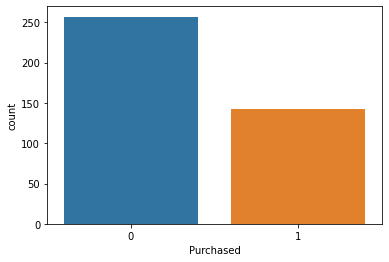

In [8]:
sns.countplot(dataset["Purchased"])

We can see around 1/3 of total peoples are actually purchasing adds.

#Let's Try analyzing data by visualization

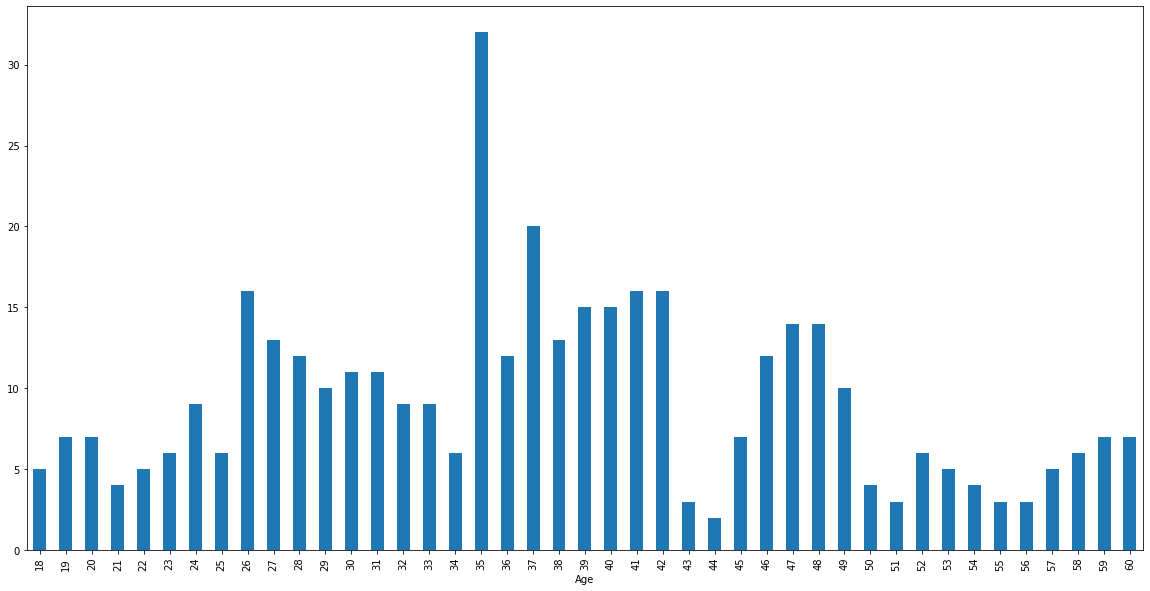

In [9]:
plt.figure(figsize=(20,10))
dataset.groupby(['Age'])['Purchased'].count().plot.bar()
#plt.ylabel('Avg Salary')
#plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()

# Proceed with any different visual data analysis in the next two cells 
(Optional but encouraged)

# After you have done visualisation and analysis
 Try to write some concluding points you understood from data,like which among the two factors does our output most depend, is there any particular trend or not,etc.

**Splitting dataset into dependent and independent variable.**
 Here age and estimated salary are the two independent variable(x) and Purchased(y) is dependent variable based on two factors age and estimated salary.

In [12]:
y= dataset.pop("Purchased")
x= dataset

# Now let split dataset into training testing for model.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=3)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


# Feature Scaling
Before feeding and fitting we'll normalise the range of the independent data  or features of data,for better results.

**Task 1** 
your task here is to use ant type of feature scaling methods from sklearn, and standardise or normalise the input features for both training as well as testing data.  And print them to see the changes when there was'nt any scaling.

# Building model

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [19]:
y_test

376    0
16     1
365    1
82     0
107    0
      ..
324    1
80     0
271    1
395    1
5      0
Name: Purchased, Length: 100, dtype: int64

In [20]:
round(np.mean(y_pred), 2)

0.4

# Model Evaluation:

**Task 2**
Your next task is to check the accuracy of our model, on both training as well as testing data. try to implement score or accuracy function(method), also find out cross validation score of model.

# Checking results visually

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


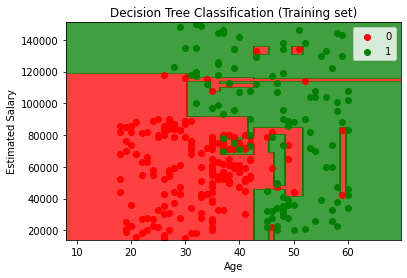

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Task 3**
Your third and final task is to, use the same method as in above cell and try to visulaise the result for training set.